In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = tf.keras.datasets.boston_housing

In [6]:
(train_data , train_labels) ,(test_data , test_labels) = dataset.load_data()

In [7]:
train_data[:,0]

array([1.23247e+00, 2.17700e-02, 4.89822e+00, 3.96100e-02, 3.69311e+00,
       2.83920e-01, 9.18702e+00, 4.09740e+00, 2.15505e+00, 1.62864e+00,
       9.59571e+00, 1.88110e+01, 1.39140e-01, 3.83684e+00, 3.87350e-01,
       7.35341e+01, 6.53876e+00, 6.46600e-02, 3.44500e-02, 1.48660e-01,
       3.76619e+01, 2.76300e-02, 1.77800e-02, 6.32000e-03, 3.04100e-02,
       9.82349e+00, 8.82900e-02, 2.72900e-02, 6.71910e-01, 1.77830e-01,
       4.59000e-02, 5.09017e+00, 7.75223e+00, 1.05393e+00, 3.35900e-02,
       3.41090e-01, 8.40540e-01, 1.15172e+00, 3.51140e-01, 1.01530e-01,
       1.50860e-01, 1.59360e-01, 5.08300e-02, 1.10874e+01, 1.33598e+01,
       7.50260e-01, 3.29820e-01, 1.00245e+00, 6.56650e-01, 6.96215e+00,
       6.15100e-02, 1.44208e+01, 5.11830e-01, 4.29700e-02, 2.31390e+00,
       6.89900e-02, 8.49213e+00, 7.36711e+00, 9.60400e-02, 6.66400e-02,
       7.16500e-02, 1.14600e-01, 1.02330e+01, 1.71200e-01, 4.75237e+00,
       5.58107e+00, 9.76170e-01, 2.20511e+01, 9.91655e+00, 3.757

In [9]:
train_labels[0]

15.2

In [10]:
train_data.shape

(404, 13)

In [11]:
test_data.shape

(102, 13)

In [12]:
train_labels.shape

(404,)

**That’s right, the “correct” way is Scenario 3. I agree, it may look a bit odd to use the training parameters and re-use them to scale the test dataset. (Note that in practice, if the dataset is sufficiently large, we wouldn’t notice any substantial difference between the scenarios 1-3 because we assume that the samples have all been drawn from the same distribution.)
Again, why Scenario 3? The reason is that we want to pretend that the test data is “new, unseen data.” We use the test dataset to get a good estimate of how our model performs on any new data.
Now, in a real application, the new, unseen data could be just 1 data point that we want to classify. (How do we estimate mean and standard deviation if we have only 1 data point?) That’s an intuitive case to show why we need to keep and use the training data parameters for scaling the test set.
To recapitulate: If we standardize our training dataset, we need to keep the parameters (mean and standard deviation for each feature). Then, we’d use these parameters to transform our test data and any future data later on**



In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


In [15]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (train_data.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
        ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [27]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [29]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('All fold Validation Errors: ', all_scores)
print('Mean of All fold Validation Errors: ', np.mean(all_scores))
print('average_mae_history: ', average_mae_history)
len(average_mae_history)

All fold Validation Errors:  [2.2859864, 2.929499, 2.7746568, 2.5710456]
Mean of All fold Validation Errors:  2.640297
average_mae_history:  [11.345852, 3.697766, 3.0813382, 2.7812395, 2.5726655, 2.4839556, 2.3827295, 2.3322585, 2.2511103, 2.1609495, 2.180595, 2.1708782, 2.088769, 2.1069877, 2.0464082, 2.0328302, 2.0171833, 2.0206409, 1.9513743, 1.9431534, 1.9281812, 1.9274712, 1.9170077, 1.872744, 1.864246, 1.8171458, 1.8540478, 1.8244709, 1.8128023, 1.8174978, 1.7913933, 1.787493, 1.754683, 1.7571081, 1.7462099, 1.728851, 1.7033008, 1.7089407, 1.7139763, 1.6879119, 1.6897149, 1.6534046, 1.6624217, 1.6562597, 1.6348126, 1.6327622, 1.6386666, 1.5948019, 1.5856314, 1.5980142, 1.5693055, 1.5780749, 1.5457473, 1.510453, 1.5370713, 1.5457141, 1.5178702, 1.4912233, 1.5178081, 1.4988596, 1.4870872, 1.4851687, 1.4853013, 1.4792302, 1.4485772, 1.4550914, 1.4320978, 1.4535053, 1.4498254, 1.4133421, 1.4119421, 1.4106579, 1.3908337, 1.4259757, 1.3962618, 1.4007428, 1.3941399, 1.383794, 1.3760095,

500

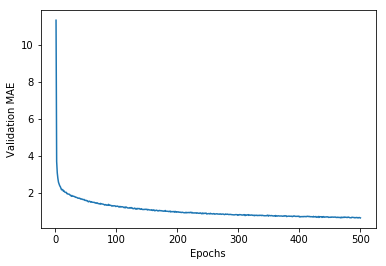

In [75]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [78]:
model = build_model()
model.fit(train_data, train_labels, epochs=80, batch_size=16, verbose=2)

Train on 404 samples
Epoch 1/80
404/404 - 1s - loss: 504.2766 - mae: 20.5119
Epoch 2/80
404/404 - 0s - loss: 331.0316 - mae: 16.0518
Epoch 3/80
404/404 - 0s - loss: 173.2268 - mae: 10.8013
Epoch 4/80
404/404 - 0s - loss: 83.5188 - mae: 7.2465
Epoch 5/80
404/404 - 0s - loss: 47.8499 - mae: 5.2968
Epoch 6/80
404/404 - 0s - loss: 31.5295 - mae: 4.1110
Epoch 7/80
404/404 - 0s - loss: 24.0324 - mae: 3.5511
Epoch 8/80
404/404 - 0s - loss: 20.2138 - mae: 3.2533
Epoch 9/80
404/404 - 0s - loss: 18.4822 - mae: 3.0419
Epoch 10/80
404/404 - 0s - loss: 16.5792 - mae: 2.8702
Epoch 11/80
404/404 - 0s - loss: 15.3514 - mae: 2.7876
Epoch 12/80
404/404 - 0s - loss: 14.3764 - mae: 2.6982
Epoch 13/80
404/404 - 0s - loss: 13.5127 - mae: 2.5770
Epoch 14/80
404/404 - 0s - loss: 12.7223 - mae: 2.5296
Epoch 15/80
404/404 - 0s - loss: 12.1271 - mae: 2.4713
Epoch 16/80
404/404 - 0s - loss: 11.6157 - mae: 2.4358
Epoch 17/80
404/404 - 0s - loss: 11.1662 - mae: 2.3594
Epoch 18/80
404/404 - 0s - loss: 10.8971 - mae:

In [79]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mae_score)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [104]:
a = model.predict(test_data[10].reshape(1,13))
a

array([[19.560137]], dtype=float32)

In [105]:
test_labels[10]

18.6

In [119]:
print("price :",round(a[0][0]*100),"$")

price : 1956.0 $


In [74]:
for i in range(num_epochs):
    print("####### IN",i,"ITERARTION ######")    
    for x in all_mae_histories :
        print(x[i])


####### IN 0 ITERARTION ######
11.79187
11.654196
11.352043
10.585296
####### IN 1 ITERARTION ######
3.9440274
3.2101836
4.021852
3.6150007
####### IN 2 ITERARTION ######
3.2942562
2.8329618
3.1947918
3.0033429
####### IN 3 ITERARTION ######
2.9479406
2.6340723
2.8291602
2.7137847
####### IN 4 ITERARTION ######
2.7359128
2.46273
2.5602043
2.5318148
####### IN 5 ITERARTION ######
2.6204214
2.412932
2.486819
2.4156506
####### IN 6 ITERARTION ######
2.548684
2.3375018
2.3726556
2.2720766
####### IN 7 ITERARTION ######
2.4654229
2.2876682
2.3689506
2.2069924
####### IN 8 ITERARTION ######
2.3918254
2.2322898
2.1877985
2.1925275
####### IN 9 ITERARTION ######
2.3251083
2.123508
2.0953147
2.0998669
####### IN 10 ITERARTION ######
2.3339422
2.1141694
2.105346
2.1689227
####### IN 11 ITERARTION ######
2.3209956
2.1693912
2.1206887
2.0724375
####### IN 12 ITERARTION ######
2.2095962
2.0362148
2.0952487
2.0140166
####### IN 13 ITERARTION ######
2.2269664
2.1276522
1.9969317
2.0764005
####### IN 

1.0726006
####### IN 188 ITERARTION ######
1.0192459
0.8791926
0.9040219
1.0409471
####### IN 189 ITERARTION ######
1.0916038
0.9218213
0.868253
1.0556124
####### IN 190 ITERARTION ######
1.0539138
0.90026665
0.89747596
1.0641848
####### IN 191 ITERARTION ######
1.0368673
0.9438249
0.86849666
1.0496119
####### IN 192 ITERARTION ######
1.0973846
0.92088413
0.84889275
1.0873227
####### IN 193 ITERARTION ######
1.0470811
0.9563905
0.8398269
1.0679024
####### IN 194 ITERARTION ######
0.9922468
0.9380201
0.816569
1.0574864
####### IN 195 ITERARTION ######
1.0963144
0.9546142
0.8804034
1.0475203
####### IN 196 ITERARTION ######
1.0797168
0.87279993
0.870242
1.091659
####### IN 197 ITERARTION ######
0.98561245
0.92245954
0.82662886
1.0486099
####### IN 198 ITERARTION ######
1.0578203
0.88498086
0.845068
1.0883152
####### IN 199 ITERARTION ######
1.040205
0.92012715
0.8842594
1.0299867
####### IN 200 ITERARTION ######
1.0385324
0.9219578
0.81878084
1.0289907
####### IN 201 ITERARTION ######
1.

0.7043832
0.67185605
0.83958495
####### IN 341 ITERARTION ######
0.83691436
0.7184781
0.6706571
0.8364678
####### IN 342 ITERARTION ######
0.8242077
0.74367106
0.62912834
0.82258964
####### IN 343 ITERARTION ######
0.78280646
0.70030946
0.65335345
0.8976871
####### IN 344 ITERARTION ######
0.80115956
0.741172
0.6787176
0.82158756
####### IN 345 ITERARTION ######
0.81766945
0.725628
0.63837874
0.8496289
####### IN 346 ITERARTION ######
0.83817
0.70563185
0.6995494
0.8698822
####### IN 347 ITERARTION ######
0.8416876
0.76329565
0.6603337
0.88364625
####### IN 348 ITERARTION ######
0.76806915
0.7024228
0.66180235
0.8096124
####### IN 349 ITERARTION ######
0.8245788
0.7378721
0.66684794
0.8772724
####### IN 350 ITERARTION ######
0.83780575
0.72736186
0.66291296
0.8548029
####### IN 351 ITERARTION ######
0.79406035
0.7266299
0.6488449
0.8733493
####### IN 352 ITERARTION ######
0.8325556
0.7312464
0.6568329
0.8042737
####### IN 353 ITERARTION ######
0.82433414
0.7221055
0.6527603
0.8761309
#